Imports


In [1]:
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [5]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [6]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_treino)
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


9

Exibir os dados

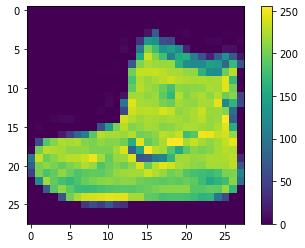

In [13]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
# modelo #vai ser em sequência
#   entrada
#   processamento
#   saida

In [7]:
# processo de dividir a imagem pela colarização é chamado de normalização, eficiente para diminuir a perca em alguns casos
imagens_treino = imagens_treino/float(255)

Criando, copilando e treinando o modelo e normalizando o modelo com Dropout

In [12]:
#criando o modelo
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

#copilando o modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

#salvando dados do modelo e treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 30, validation_split = 0.2)

Epoch 1/30
1500/1500 [==============================] - 1s 831us/step - loss: 3.4794 - accuracy: 0.6340 - val_loss: 0.8424 - val_accuracy: 0.6762
Epoch 2/30
1500/1500 [==============================] - 1s 750us/step - loss: 0.8980 - accuracy: 0.6740 - val_loss: 0.7752 - val_accuracy: 0.7094
Epoch 3/30
1500/1500 [==============================] - 1s 775us/step - loss: 0.7999 - accuracy: 0.7084 - val_loss: 0.6134 - val_accuracy: 0.7857
Epoch 4/30
1500/1500 [==============================] - 1s 747us/step - loss: 0.7477 - accuracy: 0.7282 - val_loss: 0.6306 - val_accuracy: 0.8059
Epoch 5/30
1500/1500 [==============================] - 1s 759us/step - loss: 0.7112 - accuracy: 0.7434 - val_loss: 0.5888 - val_accuracy: 0.7990
Epoch 6/30
1500/1500 [==============================] - 1s 790us/step - loss: 0.6953 - accuracy: 0.7485 - val_loss: 0.5636 - val_accuracy: 0.8144
Epoch 7/30
1500/1500 [==============================] - 1s 770us/step - loss: 0.6803 - accuracy: 0.7567 - val_loss: 0.5421 -

 Como salvar o modelo e carregar o modelo treinado

In [9]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

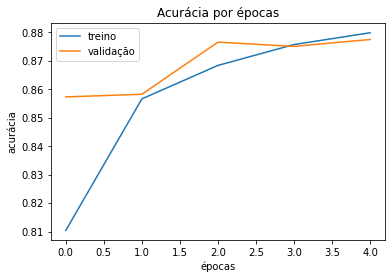

In [10]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

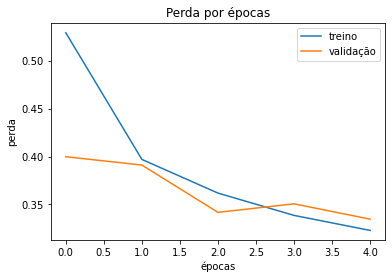

In [11]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [12]:
testes = modelo.predict(imagens_teste)
print('O resultadodo teste é: ', np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('O resultado do teste do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste do modelo salvo: ', identificacoes_teste[1])

O resultadodo teste é:  2
número da imagem de teste:  2
O resultado do teste do modelo salvo:  2
número da imagem de teste do modelo salvo:  2


Avaliando o modelo

In [13]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste,
      'Acurácia do teste: ', acuracia_teste
      )

313/313 [==============================] - 0s 574us/step - loss: 55.3123 - accuracy: 0.8523
Perda do teste:  55.312313079833984 Acurácia do teste:  0.8522999882698059
